In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import self-made module
import os, sys, pathlib
file_path = os.path.abspath('')
PROJECT_DIR = str(pathlib.Path(file_path).parent)
sys.path.append(PROJECT_DIR)
print(f"Added {PROJECT_DIR} to PATH")
from athena import *
from sympy.vector import CoordSys3D, gradient, curl

sp.init_printing()

# ult functions
def reset_symbols():
    global x, y, z, a, b, c, d, e, f, g, h, s, k, t, theta, lmda
    x, y, z = sp.symbols('x y z', real=True)
    a, b, c, d, e, f, g, h, s, k, t = sp.symbols('a b c d e f g h s k t', real=True)
    theta = sp.Symbol('theta')
    lmda = sp.Symbol('lambda')

reset_symbols()

Added /Users/puff/my_home/dev/Side_Projects/MyMathLab to PATH


In [2]:
curve = sp.Curve((6*t, t), (t, -1, 1))
curve
sp.line_integrate(x**2, curve, [x, y])

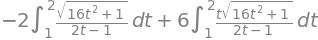

In [3]:
curve = sp.Curve((-t, 2*t**2), (t, 1, 2))
curve

f = (2*x + 3*y) / (x+y)
sp.line_integrate(f, curve, [x, y]).simplify()

In [4]:
curve = sp.Curve((sp.cos(t), sp.sin(t) - 1), (t, 0, 2*sp.pi))
curve

f = -y
sp.line_integrate(f, curve, [x, y]).simplify()

In [5]:
curve = sp.Curve((t, t), (t, 0, sp.pi))
curve

f = sp.sin(x) + sp.sin(y)
sp.line_integrate(f, curve, [x, y]).simplify()

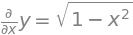

In [9]:
eq = sp.Eq(y, sp.sqrt(1 - x**2))
sp.Derivative(eq, x)

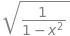

In [14]:
expr = sp.sqrt(1/(1-x**2))
expr
expr.integrate((x, -1, 1))

In [25]:
dy, dx = sp.symbols('dy dx')
f = sp.sin(x)
eq = sp.Eq(dy/dx, f.diff(*f.free_symbols))
dy = sp.solve(eq, dy)[0]
dy

expr = sp.sqrt(dx**2 + dy**2)
expr.simplify()

In [27]:
dy, dx = sp.symbols('dy dx')
f = y**2
eq = sp.Eq(dx/dy, f.diff(*f.free_symbols))
dx = sp.solve(eq, dx)[0]
dx

expr = sp.sqrt(dx**2 + dy**2)
expr.simplify()

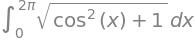

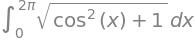

In [38]:
expr = sp.sqrt(1 + sp.sin(x).diff(x) ** 2)
expr
itg = expr.integrate((x, 0, sp.pi * 2))
itg
itg.doit()

In [36]:
expr = sp.sqrt(sp.cos(x) ** 2 + 1)
expr.subs({x:sp.pi*2})
expr.subs({x:0})

# Arch Length

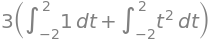

In [48]:
curve = sp.Curve((t**3-3*t, 3*t**2), (t, -2, 2))
curve
curve.length
curve.length.evalf()